# Métrics d'évaluation en classification

## 📘 Section 1 — Fondations communes des métriques de classification

### 🔹 1.1 — Types de tâches de classification

**`Classification binaire`** 

👉 Deux classes possibles : exemple classique = spam vs non-spam. <br>
**Sortie** : 0 ou 1 (ou négatif/positif)

**`Classification multiclasse`**

👉 Plus de deux classes, mais une seule classe prédite à la fois. <br>
**Exemple** : reconnaissance de chiffre manuscrit (0–9)

**`Classification multilabel`**

👉 Plusieurs classes peuvent être vraies simultanément. <br>
**Exemple** : une image peut contenir un chien, un chat et une voiture (3 étiquettes actives à la fois)

### 🔹 1.2 — La matrice de confusion (pour la classification binaire)

Elle est le point central de toutes les métriques. Elle résume les prédictions du modèle par rapport aux vraies valeurs.

|                          | Réalité : Positif (1) | Réalité : Négatif (0) |
| ------------------------ | --------------------- | --------------------- |
| **Prédit : Positif (1)** | Vrai Positif (VP)     | Faux Positif (FP)     |
| **Prédit : Négatif (0)** | Faux Négatif (FN)     | Vrai Négatif (VN)     |

<br>

✅ <u>**Définitions clés :**</u>

* **VP (True Positive)** : le modèle prédit 1 et c’est bien 1
* **VN (True Negative)** : le modèle prédit 0 et c’est bien 0
* **FP (False Positive)** : le modèle prédit 1 mais c’est en réalité 0 → faux alarme
* **FN (False Negative)** : le modèle prédit 0 mais c’est en réalité 1 → faux rejet

### 🔹 1.3 — Pourquoi c’est important ?

Les métriques qu’on verra ensuite sont toutes ***calculées à partir de VP, VN, FP, FN.*** <br>
La **signification métier** (par exemple : maladie détectée vs non) donne une grande importance à bien comprendre :

* le **coût d’une erreur FP** (faux positif) vs
* le **coût d’une erreur FN** (faux négatif)

### 📌 Exercice rapide

Soit la vérité terrain : `[1, 0, 1, 1, 0, 0, 1, 0]`.<br>
Et les prédictions du modèle : `[1, 0, 0, 1, 1, 0, 1, 0]`

1. Calcule la matrice de confusion (VP, VN, FP, FN)
2. Que représente chaque valeur dans ce contexte ?

|                          | Réalité : Positif (1) | Réalité : Négatif (0) |
| ------------------------ | --------------------- | --------------------- |
| **Prédit : Positif (1)** | **3 (VP)**            | **1 (FP)**            |
| **Prédit : Négatif (0)** | **1 (FN)**            | **3 (VN)**            |



*Imaginons que ce modèle prédit si une personne est malade (1) ou saine (0).*

| Abréviation | Signification | Interprétation dans notre exemple                                                                 |
| ----------- | ------------- | ------------------------------------------------------------------------------------------------- |
| **VP**      | Vrai Positif  | La personne est malade, et le modèle l’a bien détectée (bon diagnostic)                           |
| **VN**      | Vrai Négatif  | La personne est saine, et le modèle l’a bien classée (aucune alarme inutile)                      |
| **FP**      | Faux Positif  | La personne est saine, mais le modèle l’a classée comme malade → **fausse alerte**                |
| **FN**      | Faux Négatif  | La personne est malade, mais le modèle l’a classée comme saine → **erreur grave** (non détection) |


**🧠 Résumé métier (avec le contexte santé)**

* **FP** : peut entraîner un stress inutile, examens complémentaires inutiles, etc.
* **FN** : plus dangereux → la maladie n’est pas détectée, donc non traitée à temps.

## 📘 Section 2 — Métriques fondamentales pour la classification binaire

À partir de la **matrice de confusion**, on définit les **métriques de base**. Ce sont elles que tu verras partout dans les publications, les rapports de projets ML, les modèles médicaux, etc.

Reprenons la notation :
* **VP** = Vrai Positif
* **VN** = Vrai Négatif
* **FP** = Faux Positif
* **FN** = Faux Négatif

### 🔹 2.1 — Accuracy (Exactitude)

**Formule** : 
$$Accuracy = \frac{VP + VN}{VP + VN + FP + FN}$$

**Interprétation** : proportion de prédictions correctes sur l’ensemble des cas.

**Avantage** : intuitive et simple.

**Limite** : trompeuse si les classes sont déséquilibrées.

### 🔹 2.2 — Recall (Sensibilité, Rappel)

**Formule** : 
$$Recall=\frac{VP}{VP+FN}$$


**Interprétation** : parmi les positifs existants, combien ont été correctement détectés.

**Utilité** : critique dans les cas où il ne faut surtout pas rater un positif (ex : cancer, fraude, alerte).

### 🔹 2.3 — Precision (Précision)

**Formule** :
 
$$Precision=\frac{VP}{VP+FP}$$


**Interprétation** : parmi les cas détectés comme positifs par le modèle, combien le sont réellement.

**Utilité** : importante quand un faux positif est coûteux (ex : lancer une alerte ou bloquer un compte à tort).

### 🔹 2.4 — F1-score (F-mesure)

**Formule** : 

$$F1-score=2*\frac{Precision * Recall}{Precision + Recall}$$

**Interprétation** : moyenne harmonique entre la précision et le rappel.

**Utilité** : équilibre entre les deux, surtout quand le dataset est déséquilibré.

### 🔹 2.5 — Specificity (Spécificité)

**Formule** : 
$$Specificity=\frac{VN}{VN + FP}$$

**Interprétation** : parmi les négatifs, combien ont été correctement détectés comme tels.

**Utilité** : complémentaire du recall, surtout utile en médecine et détection de risques.

### 🔁 Exercice d’application

#### Exemple 1 : (avec notre matrice)

On avait trouvé :
* VP = 3
* VN = 3
* FP = 1
* FN = 1

**➤ Calcule manuellement ou avec Python les métriques suivantes :**
* Accuracy
* Recall
* Precision
* F1-score
* Specificity

| Métrique     | Valeur | Interprétation                                                                 |
|--------------|--------|---------------------------------------------------------------------------------|
| Accuracy     | 0.75   | 75 % des prédictions sont correctes sur l'ensemble des données                 |
| Recall       | 0.75   | 75 % des cas réellement positifs ont été détectés (sensibilité)                |
| Precision    | 0.75   | 75 % des cas prédits comme positifs sont réellement positifs                   |
| F1-score     | 0.75   | Équilibre harmonique entre précision et rappel (utile quand les classes sont déséquilibrées) |
| Specificity  | 0.75   | 75 % des cas réellement négatifs ont été correctement identifiés               |

🧠 **Observation** : Toutes les métriques sont égales ici car les erreurs sont symétriques (1 FP, 1 FN). Ce sera rarement le cas en pratique !

#### Exemple 2

y_true : `[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]` <br>
y_pred : `[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]`



|                          | Réalité : Positif (1) | Réalité : Négatif (0) |
| ------------------------ | --------------------- | --------------------- |
| **Prédit : Positif (1)** | 0 (VP)                | 0 (FP)                |
| **Prédit : Négatif (0)** | 1 (FN)                | 9 (VN)                |


<br>

| Métrique    | Valeur                        | Interprétation                                   |
| ----------- | ----------------------------- | ------------------------------------------------ |
| Accuracy    | $\frac{0 + 9}{10} = 0.9$      | Le modèle a 90 % de bonnes prédictions… **mais** |
| Recall      | $\frac{0}{0 + 1} = 0$         | 0 % des positifs sont détectés → **grave !**     |
| Precision   | **Indéfini** (division par 0) | Aucune prédiction positive n’a été faite         |
| F1-score    | **0** (par convention)        | Pas de rappel, donc score nul                    |
| Specificity | $\frac{9}{9 + 0} = 1$         | 100 % des négatifs bien détectés                 |


In [1]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
# Vraies étiquettes (très déséquilibrées)
y_true = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Prédictions du modèle (il ne prédit que des 0)
y_pred = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred)
print("Matrice de confusion :")
print(cm)

# Accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy :", acc)

# Recall
rec = recall_score(y_true, y_pred, zero_division=0)
print("Recall (sensibilité) :", rec)

# Precision
prec = precision_score(y_true, y_pred, zero_division=0)
print("Precision :", prec)

# F1-score
f1 = f1_score(y_true, y_pred, zero_division=0)
print("F1-score :", f1)

# Rapport complet
print("\nRapport détaillé :")
print(classification_report(y_true, y_pred, zero_division=0))


Matrice de confusion :
[[9 0]
 [1 0]]
Accuracy : 0.9
Recall (sensibilité) : 0.0
Precision : 0.0
F1-score : 0.0

Rapport détaillé :
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



## 📘 Section 3 — Les métriques avancées pour la classification binaire

### 🔹 3.1 — Balanced Accuracy

**Formule** :
$$Balanced Accuracy=\frac{Recall+Specificity}{2}=\frac{1}{2}(\frac{VP}{VP+FN}+\frac{VN}{VN+FP})$$

✅ **Avantage** : elle compense les déséquilibres entre classes. <br>
❗️ Contrairement à accuracy, elle donne autant d’importance à chaque classe.

**Exemple** :

Dans notre cas précédent (9 négatifs, 1 positif, modèle qui prédit toujours 0) :
* Recall = 0
* Specificity = 1

$Balanced Accuracy=0+\frac{1}{2}=0.5$
<br>

🔎 L’accuracy était de 0.90 → **trompeuse** <br>
✅ Balanced Accuracy = 0.5 → **plus honnête**

### 🔹 3.2 — Matthews Correlation Coefficient (MCC)

**Formule** :
$$MCC=\frac{(VP*VN)−(FP*FN)}{\sqrt{(VP+FP)(VP+FN)(VN+FP)(VN+FN)}}$$

**Avantage** : une des meilleures métriques globales, car elle :
* Combine tous les éléments de la matrice de confusion
* Donne un score entre -1 et 1 :
    * +1 = parfaite prédiction

    * 0 = aléatoire

    * -1 = complètement erronée

**Exemple** : <br>
Dans notre exemple :

    VP = 0, VN = 9, FP = 0, FN = 1

$$MCC=\frac{(0*9)−(0*1)}{\sqrt{(0+0)(0+1)(9+0)(9+1)}}=\frac{0}{0}=indéfini (convention : 0)$$

📌 MCC vaut **0**, car **aucun positif** n’a été prédit → ce qui reflète bien une absence de compétence.

### 🔹 3.3 — AUC-ROC (Area Under the ROC Curve)

Le **ROC (Receiver Operating Characteristic)** trace :
* Axe X : **Taux de faux positifs (FPR) = $\frac{FP}{FP+VN}$**
* Axe Y : **Taux de vrais positifs (TPR = Recall) = $\frac{VP}{VP+FN}$**

**AUC** = surface sous cette courbe
$$AUC∈[0,1]$$

* AUC = 0.5 : prédiction aléatoire
* AUC ≈ 1 : modèle parfait
* AUC < 0.5 : pire qu’aléatoire

🔍 **Utilité** : Mesure la capacité à distinguer les classes à tous les seuils de décision.

⚠️ Nécessite des **scores de probabilité** (pas seulement 0 ou 1) pour être pertinent.

### 🔹 3.4 — Courbe Precision-Recall et AUC

**`➤ Tracé`**

La courbe **Precision-Recall (PR Curve)** est un outil graphique utilisé pour évaluer la performance des modèles de classification, en particulier lorsque les données sont déséquilibrées

📌 Définition
* Axe X → **Recall** (Sensibilité) : proportion de vrais positifs détectés parmi tous les positifs réels.

* Axe Y → **Precision** : proportion de prédictions positives qui sont réellement correctes.

📌 Pourquoi utiliser la courbe Precision-Recall ? 
* ✔ Plus adaptée aux datasets déséquilibrés (ex. détection de fraudes, maladies rares). 
* ✔ Montre le compromis entre précision et rappel : un modèle peut avoir une haute précision mais un faible rappel, ou inversement. 
* ✔ Aide à choisir le seuil optimal pour classifier les données.

📌 **Différence avec la courbe ROC** :<br> Contrairement à la courbe ROC, qui prend en compte les vrais et faux négatifs, la courbe Precision-Recall se concentre uniquement sur la classe positive, ce qui la rend plus pertinente dans certains cas

📌 Plus utile que la courbe ROC quand :
* Les classes sont très déséquilibrées
* On veut récompenser la détection précise des positifs

***`➤ PR AUC`***

Surface sous la courbe precision-recall (⚠️ peut être basse même avec bon modèle, en cas de classe rare)

>📌 Plus sévère que ROC AUC dans les cas extrêmes de déséquilibre.

### 🔹 3.5 — G-Mean (Geometric Mean)

$$G-Mean=\sqrt{Recall*Specificity}​=\sqrt{(\frac{VP}{FN+VP}​)*(\frac{VN}{FP+VN}​)}$$
​

>🧠 **Avantage** : Donne une importance égale à chaque classe, favorise des modèles bien équilibrés dans leur capacité à détecter positifs et négatifs.

### 📋 Résumé

| Métrique              | Description                                 | Quand l’utiliser                                      |
|-----------------------|---------------------------------------------|--------------------------------------------------------|
| ROC AUC               | Capacité globale de classement              | Toujours utile, mais pas fiable si classes très rares  |
| Precision-Recall AUC  | Précision vs rappel                         | Classe positive rare, objectif = détection efficace    |
| MCC                   | Corrélation réelle entre y_true et y_pred   | Solide dans tous les cas, même très déséquilibrés      |
| Balanced Accuracy     | Moyenne de sensibilité/spécificité          | Meilleure que l'accuracy en cas de déséquilibre        |
| G-Mean                | Moyenne géométrique de recall et spécificité| Pour modèles équilibrés (pas trop bon que sur une seule classe) |


### Application

#### Exemple de code python

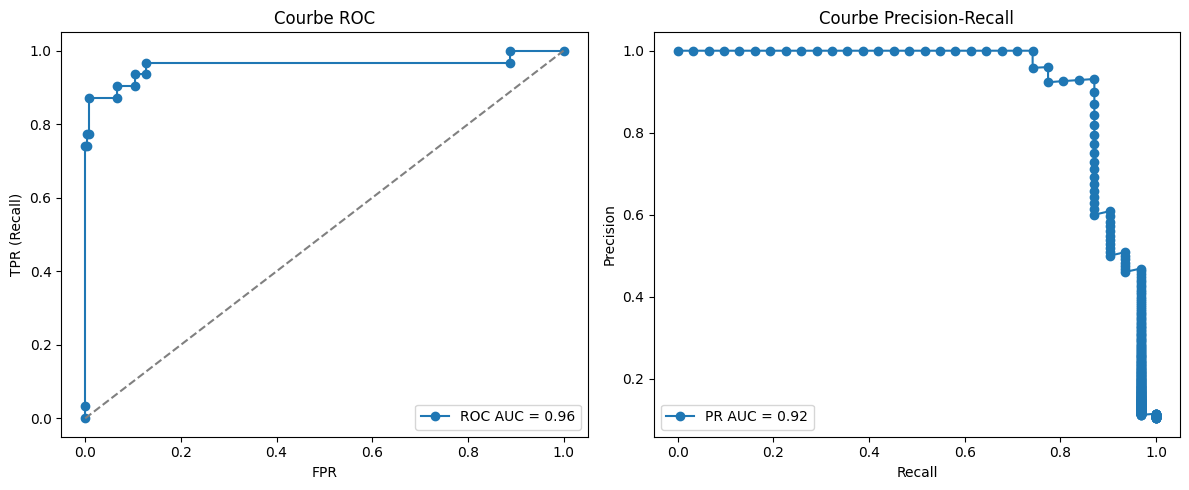

Accuracy            : 0.9733
Precision           : 1.0000
Recall              : 0.7419
F1-score            : 0.8519
Balanced Accuracy   : 0.8710
Specificity         : 1.0000
G-Mean              : 0.8614
MCC                 : 0.8488
ROC AUC             : 0.9609
PR AUC              : 0.9176


In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef, roc_auc_score, average_precision_score, 
    balanced_accuracy_score, roc_curve, precision_recall_curve
)
import matplotlib.pyplot as plt
import numpy as np

# 1. Générer un dataset déséquilibré
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=5, n_redundant=2,
    n_clusters_per_class=1, weights=[0.9, 0.1], flip_y=0.01, random_state=42
)

# 2. Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 3. Entraîner un modèle de régression logistique
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 4. Prédictions
y_scores = model.predict_proba(X_test)[:, 1]  # Probabilités
y_pred = (y_scores >= 0.5).astype(int)        # Seuil 0.5

# 5. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# 6. Métriques classiques et avancées
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
mcc = matthews_corrcoef(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
g_mean = np.sqrt(rec * specificity)
roc_auc = roc_auc_score(y_test, y_scores)
pr_auc = average_precision_score(y_test, y_scores)

# 7. Tracer les courbes ROC et PR
fpr, tpr, _ = roc_curve(y_test, y_scores)
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(12, 5))

# ROC
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, marker='o', label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
plt.title("Courbe ROC")
plt.legend()

# Precision-Recall
plt.subplot(1, 2, 2)
plt.plot(recall, precision, marker='o', label=f"PR AUC = {pr_auc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Courbe Precision-Recall")
plt.legend()

plt.tight_layout()
plt.show()

# 8. Résultats dans un dictionnaire
results = {
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1-score": f1,
    "Balanced Accuracy": balanced_acc,
    "Specificity": specificity,
    "G-Mean": g_mean,
    "MCC": mcc,
    "ROC AUC": roc_auc,
    "PR AUC": pr_auc
}

# Affichage
for metric, value in results.items():
    print(f"{metric:20s}: {value:.4f}")


#### Interprètation

| Métrique          | Valeur | Interprétation                                                              |
| ----------------- | ------ | --------------------------------------------------------------------------- |
| Accuracy          | 0.973  | Le modèle prédit globalement bien, mais cela peut être trompeur ici         |
| Precision         | 1.000  | Tous les positifs prédits sont corrects (aucun faux positif)                |
| Recall            | 0.742  | Le modèle détecte \~74% des vrais positifs                                  |
| F1-score          | 0.852  | Bon compromis entre précision et rappel                                     |
| Balanced Accuracy | 0.871  | Moyenne entre sensibilité (0.742) et spécificité (1.0)                      |
| Specificity       | 1.000  | Tous les négatifs sont bien classés                                         |
| G-Mean            | 0.861  | Le modèle est globalement équilibré                                         |
| MCC               | 0.849  | Bonne corrélation entre vrais et prédits (même avec classes déséquilibrées) |
| ROC AUC           | 0.961  | Excellente capacité à distinguer les classes                                |
| PR AUC            | 0.918  | Très bonne performance sur la classe minoritaire (positifs)                 |


## 📘 Section 4 : Métriques pour la classification multi-classes

Lorsque le problème implique **plus de deux classes** (ex : reconnaître des types de fleurs, des chiffres, des maladies, etc.), les métriques doivent être **étendues ou généralisées**.

***`Kodjo Jean DEGBEVI`***


# Métrics d'évaluation en regression